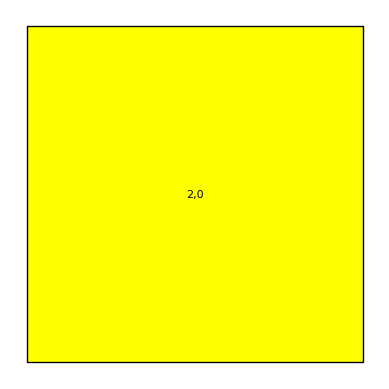

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Tile:
    def __init__(self, north, east, south, west, name):
        self.glues = {'N': north, 'E': east, 'S': south, 'W': west}
        self.name = name

    def get_glue(self, direction):
        return self.glues[direction]


class AddressableAssembly:
    def __init__(self, tile_map):
        self.tile_map = tile_map  # (x,y) → Tile
        self.asmbDict = {}
        self.seed_pos = (0, 0)
        self.asmbDict[self.seed_pos] = self.tile_map[self.seed_pos]
        self.boundary = set(self.get_empty_neighbors(self.seed_pos))

    def get_empty_neighbors(self, pos):
        x, y = pos
        neighbors = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
        return [(nx, ny) for nx, ny in neighbors if (nx, ny) in self.tile_map and (nx, ny) not in self.asmbDict]

    def grow_step(self):
        if not self.boundary:
            return
        pos = self.boundary.pop()
        tile = self.tile_map[pos]

        # Check all 4 neighbors
        x, y = pos
        compatible = True
        for dir, (dx, dy), opp in zip('NESW', [(0,1),(1,0),(0,-1),(-1,0)], 'SNEW'):
            neighbor = self.asmbDict.get((x+dx, y+dy))
            if neighbor:
                if neighbor.get_glue(opp) != tile.get_glue(dir):
                    compatible = False
                    break
        if compatible:
            self.asmbDict[pos] = tile
            self.boundary.update(self.get_empty_neighbors(pos))

    def grow(self, steps=1000):
        for _ in range(steps):
            self.grow_step()

    def plot(self):
        fig, ax = plt.subplots()
        for (x, y), tile in self.asmbDict.items():
            rect = patches.Rectangle((x, -y), 1, 1, edgecolor='black', facecolor='yellow')
            ax.add_patch(rect)
            ax.text(x+0.5, -y+0.5, tile.name, ha='center', va='center', fontsize=8)
        ax.set_aspect('equal')
        ax.autoscale()
        ax.axis('off')
        plt.show()


# Create pattern of 'A'
letter = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1]
])

def glue_name(x, y, dir):
    return f"G_{x}_{y}_{dir}"

tile_map = {}
H, W = letter.shape
for y in range(H):
    for x in range(W):
        if letter[y, x] == 1:
            north = glue_name(x, y-1, 'S') if y > 0 and letter[y-1, x] == 1 else '0'
            south = glue_name(x, y+1, 'N') if y < H-1 and letter[y+1, x] == 1 else '0'
            east  = glue_name(x+1, y, 'W') if x < W-1 and letter[y, x+1] == 1 else '0'
            west  = glue_name(x-1, y, 'E') if x > 0 and letter[y, x-1] == 1 else '0'
            name = f"{x},{y}"
            tile_map[(x, y)] = Tile(north, east, south, west, name)

# Set (0,0) as seed
# Shift all tiles so the seed is at (0, 0)
seed_old_pos = list(tile_map.keys())[0]  # first filled pixel
x0, y0 = seed_old_pos

# Create new tile map with shifted coordinates
shifted_tile_map = {}
for (x, y), tile in tile_map.items():
    new_pos = (x - x0, y - y0)
    new_tile = Tile(
        tile.glues['N'],
        tile.glues['E'],
        tile.glues['S'],
        tile.glues['W'],
        tile.name
    )
    shifted_tile_map[new_pos] = new_tile

tile_map = shifted_tile_map  # Replace with shifted map
assembly = AddressableAssembly(tile_map)
assembly.grow()
assembly.plot()


In [1]:
a = dict()
a[1] = 2


In [3]:
len(a.items())

1